In [1]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client['eleicoes_2018_tweet_analisys_db']

In [3]:
tweet_db = db.eleicoes_2018_en_db_clean

# Divisão dos sentimentos
### Como pode ser visto no gráfico abaixo apenas 5.8% dos tweets, foram positivos.
### Isso demostra que boa parte dos estrangeiros não estavam muito contentes com o desenrolar das Eleições Brasileiras

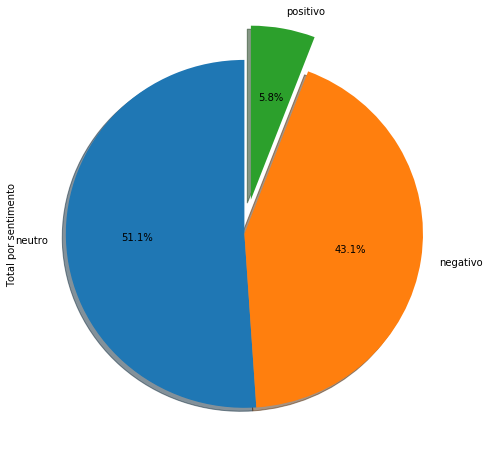

In [4]:
pipeline = []

aggResult = tweet_db.aggregate(pipeline) # returns a cursor
df = pd.DataFrame(list(aggResult)) # use list to turn the cursor to an array of documents
df = df.set_index("_id")

label = 'Total por sentimento'
explode = (0, 0, 0.2)
#224127 * .70
df.label.value_counts().plot.pie(explode=explode, label=label, figsize = (8,8), 
                                 autopct = '%1.1f%%',
                                 shadow = True, 
                                 startangle = 90)

Text(0.5,0,'Total de tweets por sentimento')

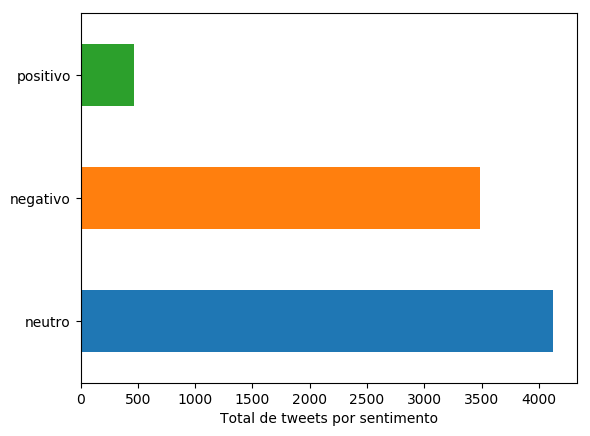

In [5]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(df))


df.label.value_counts().plot.barh(align='center', ecolor='black')
ax.set_xlabel('Total de tweets por sentimento')




# Graficos Qtd Tweets x Linha do Tempo

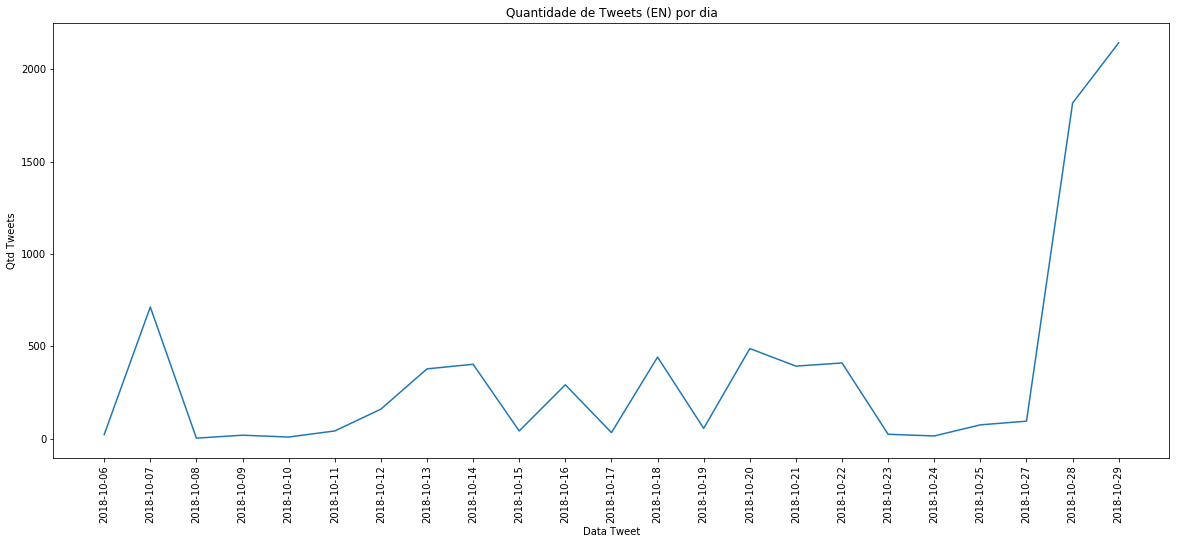

In [112]:
tweet_db = db.eleicoes_2018_en_db_clean

pipeline = []

aggResult = tweet_db.aggregate(pipeline) # returns a cursor
df = pd.DataFrame(list(aggResult)) # use list to turn the cursor to an array of documents
df = df.set_index("_id")



df_copy = df.copy()

df_copy['created_at_format'] = pd.to_datetime(df_copy['created_at'])

df_copy['created_at_format_short'] = pd.to_datetime(df_copy['created_at_format'], format = '%Y-%m-%d')

df_copy['created_at_format_short_2'] = df_copy['created_at_format_short'].astype(str).str[:10]

#df_copy.created_at_format.value_counts()


time_series = pd.DataFrame(df_copy['created_at_format_short_2'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series = time_series.sort_values(by=['date'])

time_series

label = 'Total de Tweets por data'

time_series.head()

plt.figure(figsize=(20,8))
#plt.label = 'Teste'
plt.plot(time_series['date'], time_series['count'])
plt.ylabel('Qtd Tweets')
plt.xlabel('Data Tweet')
plt.title('Quantidade de Tweets (EN) por dia')
plt.xticks(rotation='vertical')
plt.show()

In [117]:
df_2 = df_copy.groupby(['created_at_format_short_2']).agg({'id': 'count'})
df_2['tipo'] = 'TOTAL'
#df_2_pcts = df_2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

df_2

,id,tipo
created_at_format_short_2,,
2018-10-06,22,TOTAL
2018-10-07,713,TOTAL
2018-10-08,3,TOTAL
2018-10-09,19,TOTAL
2018-10-10,9,TOTAL
2018-10-11,42,TOTAL
2018-10-12,160,TOTAL
2018-10-13,378,TOTAL
2018-10-14,403,TOTAL


In [141]:
aggResult = tweet_db.find({ '$or': [ {'text': {'$regex': '#elenao'}}, {'text': {'$regex': '#elenão'}} ] })
df = pd.DataFrame(list(aggResult)) # use list to turn the cursor to an array of documents
df = df.set_index("_id")

df_copy = df.copy()

df_copy['created_at_format'] = pd.to_datetime(df_copy['created_at'])

df_copy['created_at_format_short'] = pd.to_datetime(df_copy['created_at_format'], format = '%Y-%m-%d')

df_copy['created_at_format_short_2'] = df_copy['created_at_format_short'].astype(str).str[:10]

df_3 = df_copy.groupby(['created_at_format_short_2']).agg({'id': 'count'})
df_3['tipo'] = 'ELE_NAO'




frames = [df_2, df_3]

result = pd.concat(frames)

#result.drop(columns=['tipo'], inplace=True)

#result_pcts = result.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

result.sort_values(by=['created_at_format_short_2']).head()

,id,tipo
created_at_format_short_2,,
2018-10-06,22,TOTAL
2018-10-07,713,TOTAL
2018-10-07,4,ELE_NAO
2018-10-08,3,TOTAL
2018-10-09,19,TOTAL


# #elenao

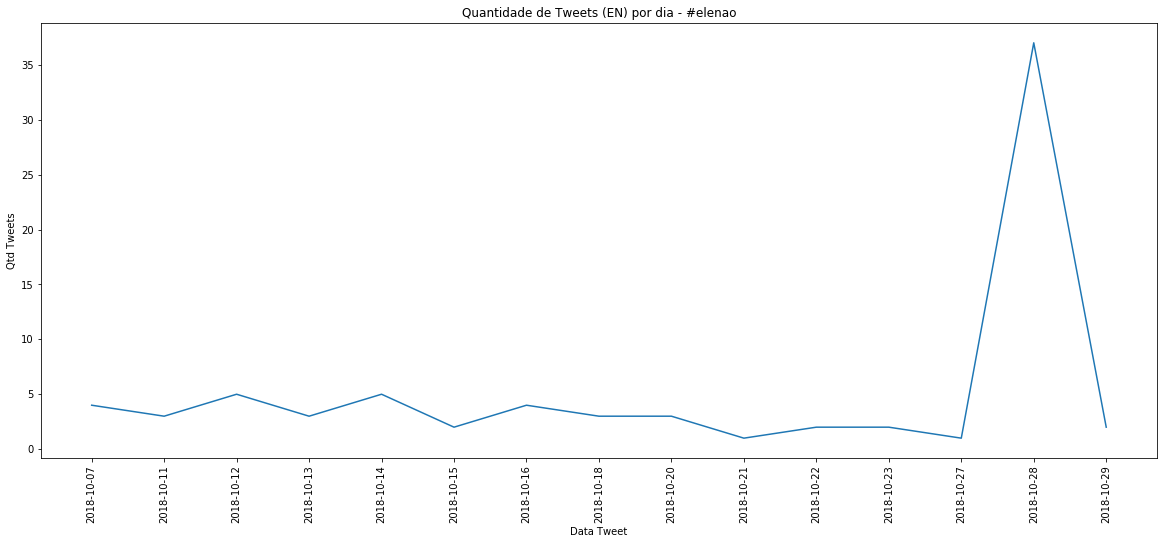

In [90]:
aggResult = tweet_db.find({ '$or': [ {'text': {'$regex': '#elenao'}}, {'text': {'$regex': '#elenão'}} ] })
df = pd.DataFrame(list(aggResult)) # use list to turn the cursor to an array of documents
df = df.set_index("_id")

df_copy = df.copy()

df_copy['created_at_format'] = pd.to_datetime(df_copy['created_at'])

df_copy['created_at_format_short'] = pd.to_datetime(df_copy['created_at_format'], format = '%Y-%m-%d')

df_copy['created_at_format_short_2'] = df_copy['created_at_format_short'].astype(str).str[:10]

#df_copy.created_at_format.value_counts()


time_series = pd.DataFrame(df_copy['created_at_format_short_2'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series = time_series.sort_values(by=['date'])

time_series

label = 'Total de Tweets por data'

time_series.head()

plt.figure(figsize=(20,8))
#plt.label = 'Teste'
plt.plot(time_series['date'], time_series['count'])
plt.ylabel('Qtd Tweets')
plt.xlabel('Data Tweet')
plt.title('Quantidade de Tweets (EN) por dia - #elenao')
plt.xticks(rotation='vertical')
plt.show()

# #elesim

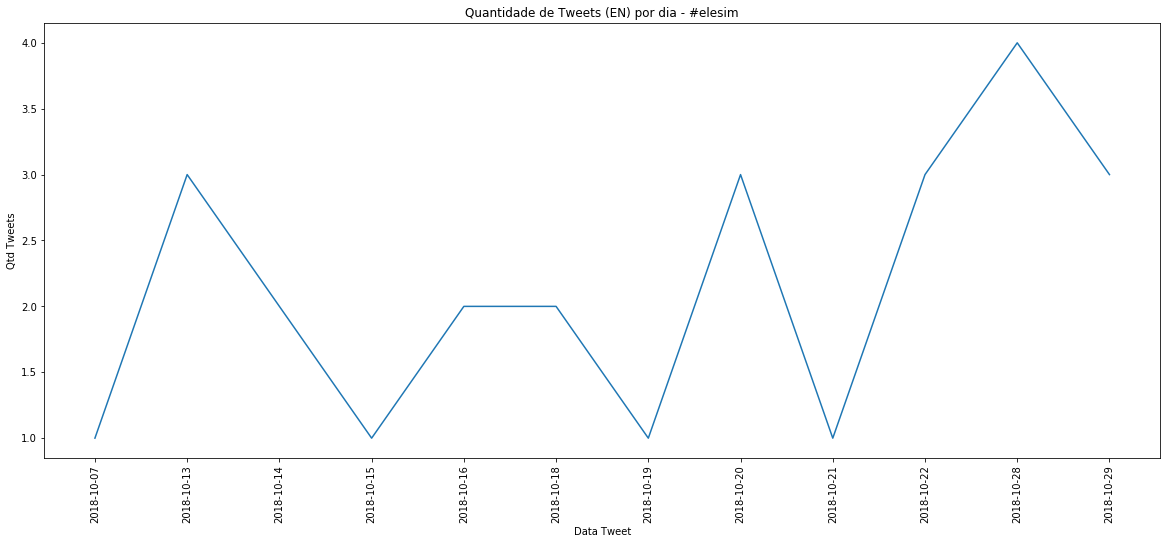

In [142]:
aggResult = tweet_db.find({ '$or': [ {'text': {'$regex': '#elesim'}}, {'text': {'$regex': '#elesim'}} ] })
df = pd.DataFrame(list(aggResult)) # use list to turn the cursor to an array of documents
df = df.set_index("_id")

df_copy = df.copy()

df_copy['created_at_format'] = pd.to_datetime(df_copy['created_at'])

df_copy['created_at_format_short'] = pd.to_datetime(df_copy['created_at_format'], format = '%Y-%m-%d')

df_copy['created_at_format_short_2'] = df_copy['created_at_format_short'].astype(str).str[:10]

#df_copy.created_at_format.value_counts()


time_series = pd.DataFrame(df_copy['created_at_format_short_2'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series = time_series.sort_values(by=['date'])

time_series

label = 'Total de Tweets por data'

time_series.head()

plt.figure(figsize=(20,8))
#plt.label = 'Teste'
plt.plot(time_series['date'], time_series['count'])
plt.ylabel('Qtd Tweets')
plt.xlabel('Data Tweet')
plt.title('Quantidade de Tweets (EN) por dia - #elesim')
plt.xticks(rotation='vertical')
plt.show()

# Bolsonaro

In [152]:
aggResult = tweet_db.find({ '$or': [ {'text': {'$regex': 'bolsonaro'}}, {'text': {'$regex': 'Bolsonaro'}} ] })
df = pd.DataFrame(list(aggResult)) # use list to turn the cursor to an array of documents
df = df.set_index("_id")

df_copy = df.copy()

df_copy['created_at_format'] = pd.to_datetime(df_copy['created_at'])

df_copy['created_at_format_short'] = pd.to_datetime(df_copy['created_at_format'], format = '%Y-%m-%d')

df_copy['created_at_format_short_2'] = df_copy['created_at_format_short'].astype(str).str[:10]

#df_copy.created_at_format.value_counts()


time_series = pd.DataFrame(df_copy['created_at_format_short_2'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series_bolso = time_series.sort_values(by=['date'])

time_series_bolso.head()

,date,count
18,2018-10-06,8
9,2018-10-07,157
22,2018-10-08,1
20,2018-10-09,4
21,2018-10-10,3


# Haddad

In [153]:
aggResult = tweet_db.find({ '$or': [ {'text': {'$regex': 'haddad'}}, {'text': {'$regex': 'Haddad'}} ] })
df = pd.DataFrame(list(aggResult)) # use list to turn the cursor to an array of documents
df = df.set_index("_id")

df_copy = df.copy()

df_copy['created_at_format'] = pd.to_datetime(df_copy['created_at'])

df_copy['created_at_format_short'] = pd.to_datetime(df_copy['created_at_format'], format = '%Y-%m-%d')

df_copy['created_at_format_short_2'] = df_copy['created_at_format_short'].astype(str).str[:10]

#df_copy.created_at_format.value_counts()


time_series = pd.DataFrame(df_copy['created_at_format_short_2'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series_haddad = time_series.sort_values(by=['date'])

time_series_haddad.head()

,date,count
21,2018-10-06,2
8,2018-10-07,60
19,2018-10-08,2
20,2018-10-09,2
17,2018-10-11,9


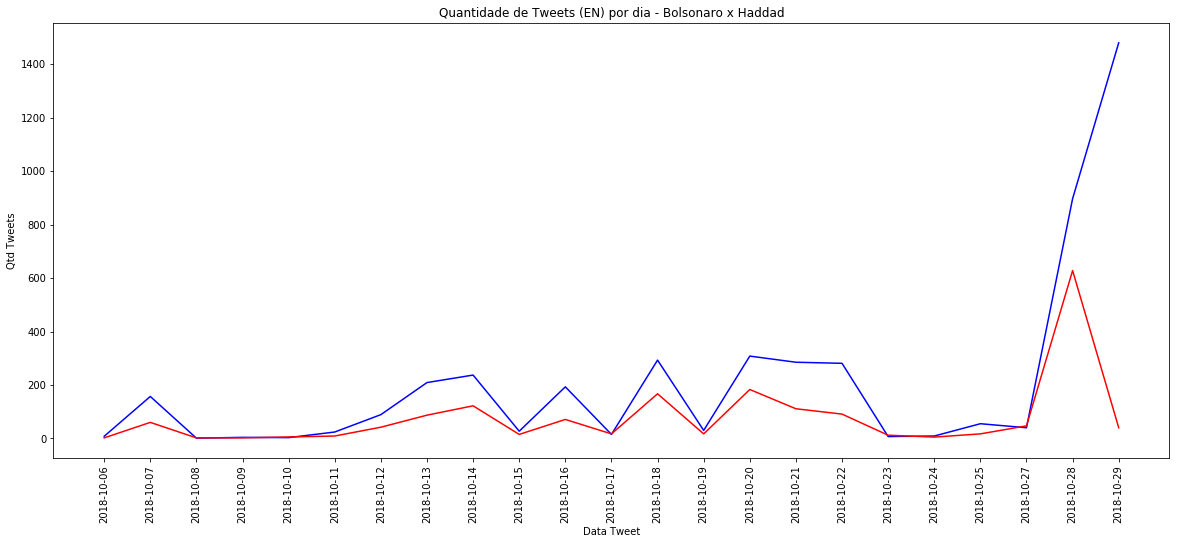

In [157]:
label = 'Total de Tweets por data'

plt.figure(figsize=(20,8))
#plt.label = 'Teste'
plt.plot(time_series_bolso['date'], time_series_bolso['count'], color="blue")
plt.plot(time_series_haddad['date'], time_series_haddad['count'], color="red")

plt.ylabel('Qtd Tweets')
plt.xlabel('Data Tweet')
plt.title('Quantidade de Tweets (EN) por dia - Bolsonaro x Haddad')
plt.xticks(rotation='vertical')
plt.show()